<a href="https://colab.research.google.com/github/mohith2000/data-science-project/blob/main/mohithfinaldissertation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install spacy

In [2]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 35.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
import spacy
nlp = spacy.load('en_core_web_sm')
print("SpaCy language model loaded successfully!")


SpaCy language model loaded successfully!


In [4]:
# libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings, gc
import re, string
warnings.simplefilter('ignore')
pd.set_option('display.max_colwidth', None)

# sklearn
from sklearn.feature_extraction.text import *
from sklearn.model_selection import *
from sklearn.ensemble import *
from sklearn.linear_model import *
from sklearn.metrics import *
from sklearn.pipeline import *
from sklearn.compose import *
from sklearn.base import *
from sklearn.preprocessing import *

# spacy

import spacy
#pip3 pickle.dump(pipe3,open('Cyberbullying_model.pkl','wb'))install en-core-web-sm
import en_core_web_sm
from spacy.lang.en.stop_words import STOP_WORDS
#from spacy.tokenizer import Tokenizer
nlp = spacy.load('en_core_web_sm')
#spacy_tokenizer = Tokenizer(nlp.vocab)

# nltk
import nltk
from nltk.tokenize import TweetTokenizer
#nltk.download('wordnet')


# visualize
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# file path
df = pd.read_csv('/content/drive/My Drive/cyberbullying_tweets.csv')
# lower case column names
df.columns = [c.strip().lower() for c in df.columns]

# sampling records for easy training
n = 1000
df = df.groupby('cyberbullying_type', group_keys=False).apply(lambda x: x.sample(n))

# reset index
df.reset_index(drop=True, inplace=True)

# view
df.head()

,tweet_text,cyberbullying_type
0,my dad died and white girls from middle/high school wanna be nice all of a sudden. u bullied me i ain’t forget,age
1,"I’m from the town she is. There’s lots of biracial couples and kids,i also attended the same high school she did about 4 years sooner and I find it hard to believe she was bullied at all much less because of her race. She’s a beautiful girl,I just don’t believe anything she says.",age
2,my high school classmate who used to lowkey bully me because i wasnt one of the pretty girls in our class just casually slid into my DMs and asked me if i wanna make out LMAO my villain origin story me thinks.....,age
3,the anxiety of being separated into boys and girls in high school during PE was INTENSE because i was so scared of straight boys due to being bullied from time to time. i had no actual male friends and i was always miserable when this happened.,age
4,Really I was standing right next to Ricky when that email from that girl came through the one that Courtney bullied how do you think we found out the name of the high school,age


In [7]:
df.shape

(6000, 2)

In [8]:
df.tail()

,tweet_text,cyberbullying_type
5995,"Isis tho is a political terrorist organization that hides behind Islam to justify murder even tho they don’t follow the Quran, big difference.",religion
5996,Trump holding the bible is like ISIS holding the Quran. Both are terrorists that use holy books for political agenda. Fucking disgusting.,religion
5997,I hope u will also talk about Kashmiri Hindu Pandits' genocide &amp; Exodus by Islamic terrorism,religion
5998,"I don't have to be American to see idiocy & race baiting? I live a country where racism is in constitution, putting me, a muslim, ahead of everyone else! What you have there it's hardly racism, just bunch of hysterical &amp; virtue signalling idiots with police brutality problem!",religion
5999,Do you know what's happening with Muslims in china. Idiot you just paid to spit venom against India and brainwash innocent kashmiri people.,religion


In [9]:
df.sample(10)

,tweet_text,cyberbullying_type
1333,"“@HeidiiFreeman: ""You look dumb as fuck my nigger. "" Hahahah.”Bahahah this made me roll",ethnicity
4701,@Lawsonbulk @SylviaZ1913 Chaffetz is the ð¡Townð Idiot ð¹ð©,other_cyberbullying
843,"I remember this guy in middle school, he was friends with my brother and I kid you not this man was gay and would always “bully” me but in like a friendly way... I remember this one time I had to take the bus home and he was walking behind me",age
2145,"Rape jokes are okay. Just like fat jokes, gay jokes, genocidal jokes, slave jokes, pope jokes, and religious jokes",gender
3856,"Just told @antoniosmith94 about his ninja celebration being on the #BATTLEDRINK board. His reply: ""Thats cool. I like to get people licked.""",not_cyberbullying
2429,"RT @RampaigerA79: @MT8_9 http://t.co/MgzUVS5oMi Even in wrestling, it has its share of Feminist Authority figures! Guess who called out on …",gender
739,In high school all the girls bullied me for looking like this... but not I get compliments daily from men who think I'm atractive. Then I tell them it's bc I'm conservative lmao they usually agree.,age
1760,@Kayyloco what a dumb question. go fuck yourself u dumb nigger,ethnicity
5893,@Vandaliser @sajid_fairooz @IsraeliRegime Read Ibn Warraq on the treatement of Jews and other minorities in Muslim history.,religion
1775,"“@tayyoung_: FUCK OBAMA, dumb ass nigger” https://twitter.com/ImUniquelyAnnie/status/266042332896452608/photo/1",ethnicity


In [10]:
df.duplicated().sum()

2

In [11]:
df.drop_duplicates(subset='tweet_text',keep='first',inplace=True)

In [12]:
df['tweet_text'].nunique()

5962

In [13]:
df['cyberbullying_type'].value_counts()

,count
cyberbullying_type,
age,1000
ethnicity,1000
religion,1000
not_cyberbullying,999
gender,998
other_cyberbullying,965


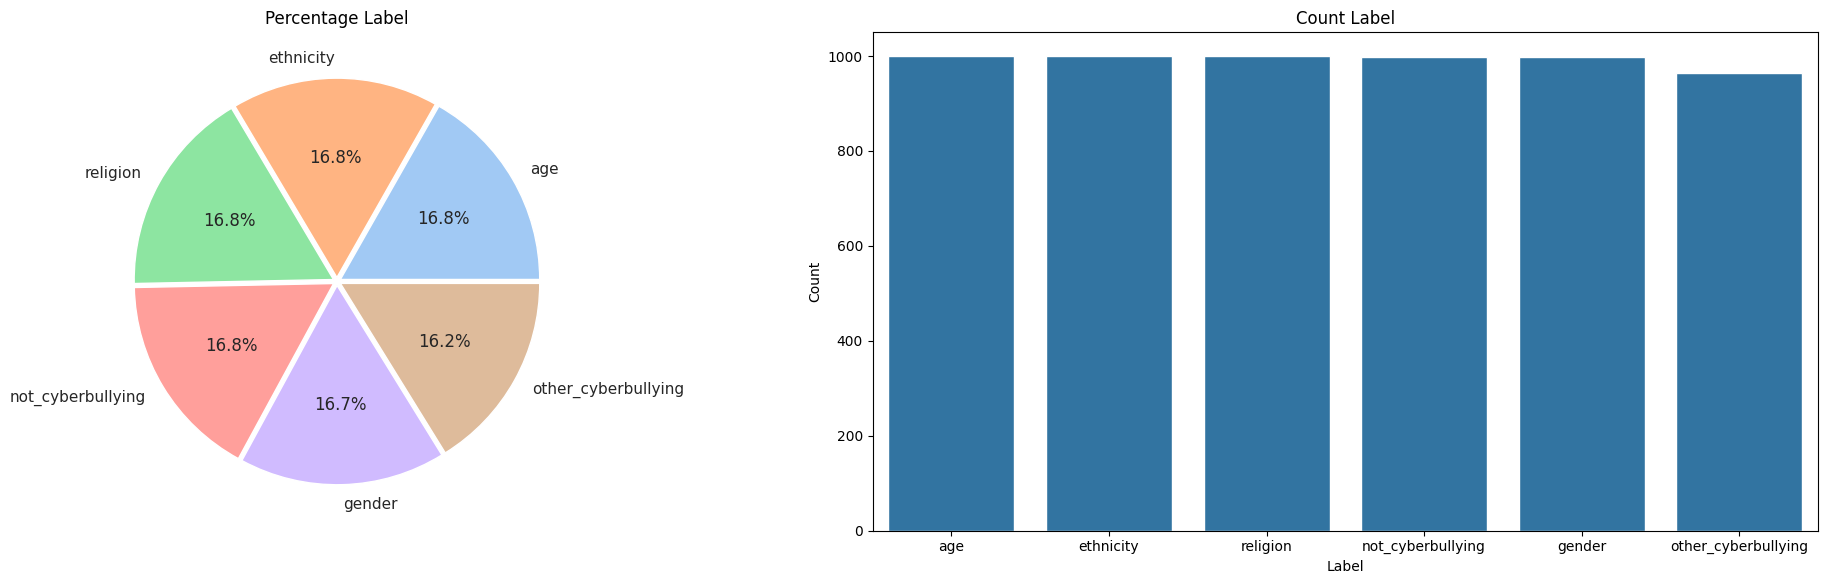

In [14]:
#Value Label Count
label_count = df['cyberbullying_type'].value_counts()
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

#Set Vusualization
sns.set_theme(style='darkgrid', palette='pastel')
color = sns.color_palette(palette='pastel')
explode = [0.02]*len(label_count)

#Pie
axes[0].pie(label_count.values, labels=label_count.index, autopct='%1.1f%%', colors=color, explode=explode)
axes[0].set_title('Percentage Label')

#Bar
sns.barplot(x=label_count.index, y=label_count.values, ax=axes[1])
axes[1].set_title('Count Label')
axes[1].set_xlabel('Label')
axes[1].set_ylabel('Count')

#Show
plt.tight_layout()
plt.show()


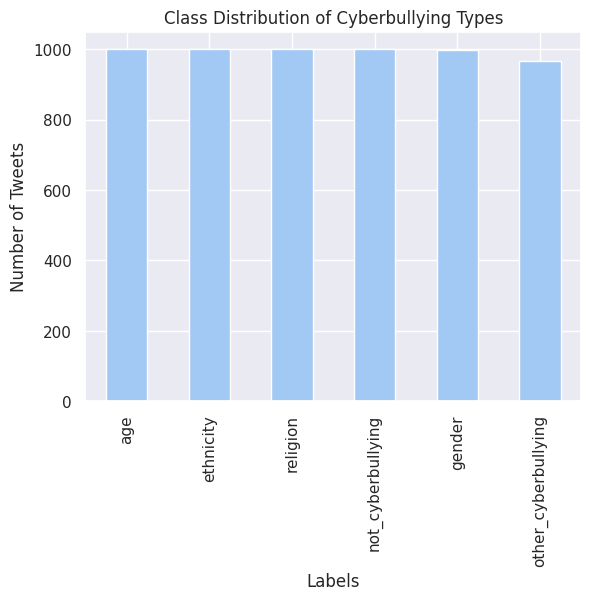

In [15]:
# Create a bar plot of the class distribution
class_counts = df['cyberbullying_type'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Cyberbullying Types')
plt.xlabel('Labels')
plt.ylabel('Number of Tweets')
plt.show()

In [16]:
from collections import Counter
import re

import nltk
from nltk.corpus import stopwords

In [17]:
# Concatenate all tweet texts into a single string
all_text = ' '.join(df['tweet_text'].values)
# Remove URLs, mentions, and hashtags from the text
all_text = re.sub(r'http\S+', '', all_text)
all_text = re.sub(r'@\S+', '', all_text)
all_text = re.sub(r'#\S+', '', all_text)
# Split the text into individual words
words = all_text.split()

In [18]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
# Remove stop words
#nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

In [20]:
# Count the frequency of each word
word_counts = Counter(words)
top_words = word_counts.most_common(100)
top_words

[('I', 1990),
 ('school', 834),
 ('like', 667),
 ('high', 599),
 ('bullied', 548),
 ('RT', 546),
 ('dumb', 542),
 ('people', 483),
 ('u', 397),
 ('rape', 376),
 ('fuck', 372),
 ('&amp;', 368),
 ('one', 357),
 ('bully', 333),
 ('You', 330),
 ('The', 329),
 ('girls', 328),
 ('gay', 322),
 ('ass', 321),
 ('get', 315),
 ('nigger', 314),
 ('girl', 301),
 ("I'm", 265),
 ('think', 252),
 ('know', 252),
 ('jokes', 248),
 ('black', 234),
 ('say', 215),
 ('would', 214),
 ('white', 210),
 ('even', 205),
 ('got', 203),
 ('FUCK', 196),
 ('make', 191),
 ('call', 186),
 ('called', 185),
 ('still', 184),
 ('And', 182),
 ('Muslims', 175),
 ('never', 172),
 ('Muslim', 172),
 ('want', 167),
 ('-', 166),
 ('see', 162),
 ('ur', 162),
 ('go', 161),
 ('A', 156),
 ('This', 152),
 ('right', 148),
 ('Christian', 148),
 ('women', 145),
 ('fucking', 145),
 ('idiot', 142),
 ('bullies', 141),
 ('really', 141),
 ('shit', 137),
 ('If', 134),
 ('hate', 133),
 ('But', 133),
 ('joke', 131),
 ('time', 129),
 ('don’t', 12

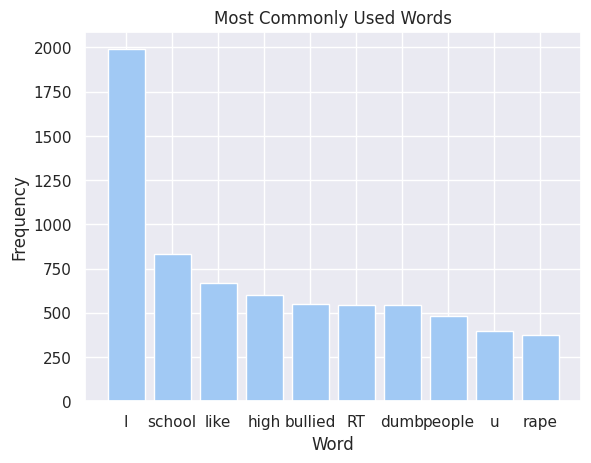

In [21]:
# Create a bar chart of the most common words
top_words = word_counts.most_common(10) # Change the number to show more/less words
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]
plt.bar(x_values, y_values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words')
plt.show()

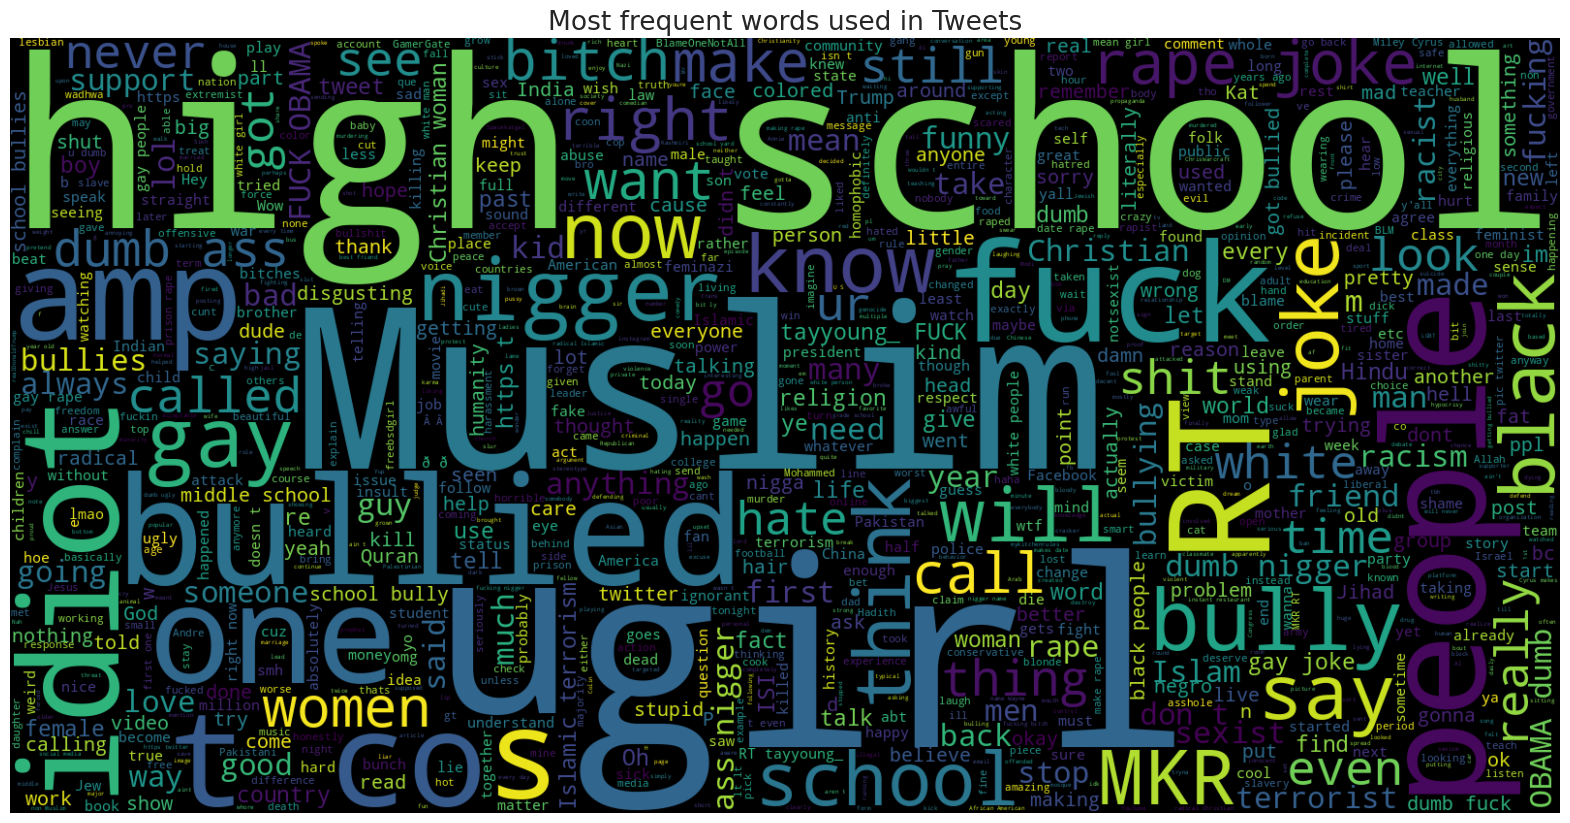

In [22]:
#!pip install wordcloud
from wordcloud import WordCloud

text = ' '.join([word for word in df['tweet_text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=1000, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words used in Tweets', fontsize=19)
plt.show()

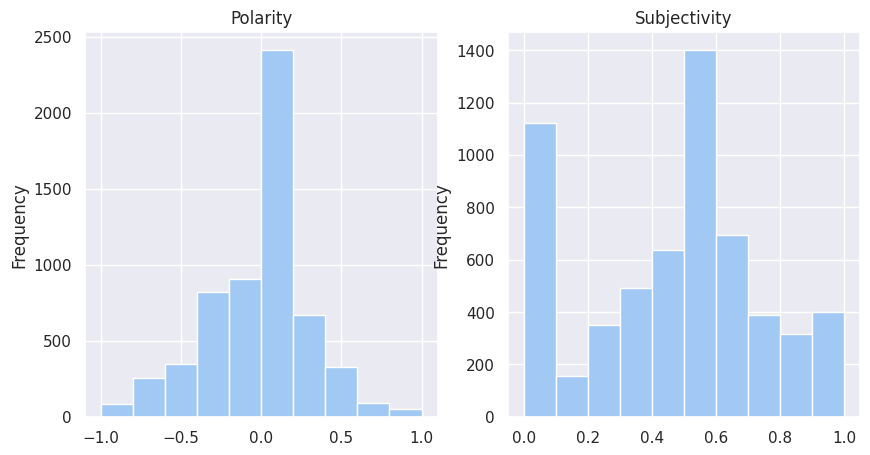

In [23]:
#!pip install -U textblob
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# perform sentiment analysis on each text in DataFrame
sentiment_scores = []
for text in df['tweet_text']:
    analysis = TextBlob(text)
    sentiment_scores.append((analysis.sentiment.polarity, analysis.sentiment.subjectivity))

# create DataFrame with sentiment scores
sentiment_df = pd.DataFrame(sentiment_scores, columns=['polarity', 'subjectivity'])

# plot distribution of sentiment scores
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sentiment_df['polarity'].plot(kind='hist', ax=axes[0], title='Polarity')
sentiment_df['subjectivity'].plot(kind='hist', ax=axes[1], title='Subjectivity')
plt.show()

In [24]:
# utility function to clean text
def cleaner(raw):

    # convert to lower case
    processed_sent = str(raw).lower()

    # remove user mentions & urls
    processed_sent = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", processed_sent)

    # remove special chars
    processed_sent = re.sub(r'\W', ' ', str(processed_sent))

    # remove single characters from the start
    processed_sent = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_sent)

    # remove hashtags but keep the text
    processed_sent = processed_sent.replace("#", "").replace("_", " ")

    # remove digits
    processed_sent = re.sub(r'\d+', '', str(processed_sent))

    # remove non alphanumeric chars
    processed_sent = ' '.join(e for e in processed_sent.split(' ') if e.isalnum())
    processed_sent = re.sub(r'[^A-Za-z0-9]+', ' ', str(processed_sent))

    # remove single chars
    processed_sent = re.sub(r'\s+[a-zA-Z]\s+', ' ', str(processed_sent))

    # remove punctuations
    punct = list(string.punctuation)
    special_punct=['©', '^', '®',' ','¾', '¡','!']
    punct.extend(special_punct)
    for p in punct:
        if p in processed_sent:
            processed_sent = processed_sent.replace(p, ' ')

    return processed_sent.lower()


# utility function to remove stop words
def remove_stopwords(sentence):
    doc = nlp(sentence)
    filtered_tokens = [token for token in doc if not token.is_stop]
    return ' '.join([token.text for token in filtered_tokens])

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Load NLTK stemmer
stemmer = PorterStemmer()

def apply_stemming(text):
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

In [25]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [26]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [27]:
# apply the function
df['tweet_text'] = df['tweet_text'].apply(lambda x: cleaner(x))
df['tweet_text'] = df['tweet_text'].apply(lambda x: remove_stopwords(x))
df['tweet_text'] = df['tweet_text'].apply(lambda x: apply_stemming(x))

# view
df.head(10)

,tweet_text,cyberbullying_type
0,dad die white girl middl high school wan na nice sudden bulli ain forget,age
1,town lot biraci coupl kid attend high school year sooner find hard believ bulli race beauti girl don believ say,age
2,high school classmat lowkey bulli nt pretti girl class casual slid dm ask wan na lmao villain origin stori think,age
3,anxieti separ boy girl high school pe intens scare straight boy bulli time time actual male friend miser happen,age
4,stand right ricki email girl came courtney bulli think found high school,age
5,sb legend blue sea drama bulli high school girl,age
6,govern allow cosa union bulli good gir intern imag send children privat school reason receiv subsidi union child school schedul,age
7,convinc best friend middl school crush fact bulli nt know,age
8,fb friend girl bulli hardest high school beauti home start think evil good wast smh,age
9,mother son dre jaden smith china job know littl karat match school bulli cheng dre meet mr han jacki chan martial art master teach dre kung fu dre abl face cheng tournament amp heart mei ying,age


In [28]:
df.sample(10)

,tweet_text,cyberbullying_type
3289,omg love pommi partli bc great pommiesforthewin mkr,not_cyberbullying
5761,mr idiot minist incid occur place malappuram incid place palakkad killer belong hindu commun messag commun stori peopl man eater preach religi hatr dalit muslim,religion
5007,christian dumb muslim dumb religion exist enforc misogyni idiot,religion
1794,imo tell racism aliv eint sick rt get black white color,ethnicity
453,found m close friend stori insta girl bulli high school,age
5323,abil let control leav iton great countri india democraci countri situat hindutwa countri prime minist india modi ugli idiot said don right stay muslim,religion
2722,give fli fuck sexist men shouldn lower tattoo,gender
2806,brian peter quagmir stewi polit soapbox joke mental challeng peopl rape joke gay joke,gender
4386,oh god majest,other_cyberbullying
3811,yeah men known complet respons drinker puke chromosom anti puke chromosom,not_cyberbullying


In [29]:
# feature engineering
x, y = df['tweet_text'], df['cyberbullying_type']

# train & test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=np.random.randint(10))

# view
print(f"Training Size: {x_train.shape[0]}\nValidation Size: {x_test.shape[0]}")

Training Size: 4769
Validation Size: 1193


In [48]:
# define custom tokenizer
def tokenizer(txt):
    tok = TweetTokenizer()
    return tok.tokenize(txt)
# define vectorizer
vectorizer = HashingVectorizer(n_features=(2 ** 22),
                             ngram_range=(1,1),
                             tokenizer= tokenizer,
                             stop_words=list(STOP_WORDS))
# define classifier
kwargs = {'max_iter': 1,
          'early_stopping': True,
          'n_jobs': -1,
          'random_state': np.random.randint(10),
          'class_weight': 'balanced',
          'average': True}

clf = PassiveAggressiveClassifier(**kwargs)


# create pipeline
pipe = Pipeline([('vectorizer', vectorizer),
                 ('classifier', clf)])

# fit pipe
pipe.fit(x_train,y_train)

# predictions
pred = pipe.predict(x_test)

# training accuracy
acc_tr = '{:.2%}'.format(pipe.score(x_train,y_train))
acc_act = '{:.2%}'.format(accuracy_score(y_test,pred))
print(f"Training Accuracy: {acc_tr}")
print(f"Validation Accuracy: {acc_act}")
report = classification_report(y_test,pred)
print(report)


Training Accuracy: 89.87%
Validation Accuracy: 78.67%
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       240
           1       0.95      0.98      0.97       247
           2       0.88      0.79      0.84       259
           3       0.55      0.51      0.53       257
           4       0.54      0.56      0.55       255
           5       0.90      0.93      0.92       233

    accuracy                           0.79      1491
   macro avg       0.79      0.79      0.79      1491
weighted avg       0.78      0.79      0.78      1491



In [31]:
from sklearn.ensemble import AdaBoostClassifier


# define vectorizer
vectorizer = HashingVectorizer(n_features=(2 ** 22),
                             ngram_range=(1,1),
                             tokenizer= tokenizer,
                             stop_words=list(STOP_WORDS))






pipe1 = Pipeline([('vectorizer',vectorizer),
                  ('classifier',AdaBoostClassifier())])

#Train
pipe1.fit(x_train,y_train)

#Predict
pred = pipe1.predict(x_test)
# training accuracy
acc_tr = '{:.2%}'.format(pipe1.score(x_train,y_train))
acc_act = '{:.2%}'.format(accuracy_score(y_test,pred))
print(f"Training Accuracy: {acc_tr}")
print(f"Validation Accuracy: {acc_act}")
report = classification_report(y_test,pred)
print(report)

#print('Accuracy:{:.3f}'.format(accuracy_score(y_test,y_pred)))
#print(classification_report(y_test,y_pred,target_names=class_names))


Training Accuracy: 66.87%
Validation Accuracy: 65.72%
                     precision    recall  f1-score   support

                age       0.99      0.93      0.96       189
          ethnicity       0.99      0.75      0.85       204
             gender       0.91      0.48      0.63       189
  not_cyberbullying       0.13      0.03      0.05       212
other_cyberbullying       0.35      0.95      0.51       194
           religion       0.99      0.84      0.91       205

           accuracy                           0.66      1193
          macro avg       0.73      0.66      0.65      1193
       weighted avg       0.72      0.66      0.65      1193



In [32]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
matrix = cv.fit_transform(df['tweet_text'])
word_matrix = pd.DataFrame(matrix.toarray(),columns=cv.get_feature_names_out())

In [33]:
outputs = matrix.toarray()
outputs[100:105,190:200]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [34]:
cv.get_feature_names_out()[:10]

array(['aaaa', 'aaaaaaaahhhhhhh', 'aaaaah', 'aajaatay', 'aamerrahman',
       'aander', 'ab', 'abandon', 'abandona', 'abbu'], dtype=object)

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
x = df['tweet_text']
#encode for train
y,class_names = pd.factorize(df['cyberbullying_type'],sort=True)


#split train & test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)

# view
print(f"Training Size: {x_train.shape[0]}\nValidation Size: {x_test.shape[0]}")


Training Size: 4471
Validation Size: 1491


In [36]:
from sklearn.naive_bayes import MultinomialNB
# MultinomiaNB

pipe3 = Pipeline([('vectorizer',TfidfVectorizer()),
                  ('classifier',MultinomialNB())])

#Train
pipe3.fit(x_train,y_train)

#Predict
pred = pipe3.predict(x_test)

acc_tr = '{:.2%}'.format(pipe3.score(x_train,y_train))
acc_act = '{:.2%}'.format(accuracy_score(y_test,pred))
print(f"Training Accuracy: {acc_tr}")
print(f"Validation Accuracy: {acc_act}")
report = classification_report(y_test,pred)
print(report)


Training Accuracy: 88.01%
Validation Accuracy: 70.36%
              precision    recall  f1-score   support

           0       0.65      0.98      0.78       240
           1       0.74      0.94      0.83       247
           2       0.83      0.81      0.82       259
           3       0.66      0.32      0.43       257
           4       0.59      0.26      0.36       255
           5       0.67      0.96      0.79       233

    accuracy                           0.70      1491
   macro avg       0.69      0.71      0.67      1491
weighted avg       0.69      0.70      0.67      1491



In [37]:
pipe4 = Pipeline([('vectorizer',TfidfVectorizer()),
                  ('classifier',LogisticRegression(max_iter=1000))])

#Train
pipe4.fit(x_train,y_train)

#Predict
pred = pipe4.predict(x_test)
acc_tr = '{:.2%}'.format(pipe4.score(x_train,y_train))
acc_act = '{:.2%}'.format(accuracy_score(y_test,pred))
print(f"Training Accuracy: {acc_tr}")
print(f"Validation Accuracy: {acc_act}")
report = classification_report(y_test,pred)
print(report)






Training Accuracy: 93.45%
Validation Accuracy: 78.34%
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       240
           1       0.96      0.95      0.95       247
           2       0.91      0.78      0.84       259
           3       0.55      0.54      0.54       257
           4       0.54      0.57      0.56       255
           5       0.90      0.92      0.91       233

    accuracy                           0.78      1491
   macro avg       0.79      0.79      0.79      1491
weighted avg       0.79      0.78      0.78      1491



In [42]:
from sklearn.svm import SVC

pipe5 = Pipeline([('vectorizer',TfidfVectorizer()),
                  ('classifier',SVC())])

#Train
pipe5.fit(x_train,y_train)

#Predict
pred = pipe5.predict(x_test)
acc_tr = '{:.2%}'.format(pipe5.score(x_train,y_train))
acc_act = '{:.2%}'.format(accuracy_score(y_test,pred))
print(f"Training Accuracy: {acc_tr}")
print(f"Validation Accuracy: {acc_act}")
report = classification_report(y_test,pred)
print(report)



Training Accuracy: 98.43%
Validation Accuracy: 79.41%
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       240
           1       0.96      0.95      0.96       247
           2       0.96      0.77      0.85       259
           3       0.58      0.52      0.55       257
           4       0.55      0.68      0.61       255
           5       0.92      0.90      0.91       233

    accuracy                           0.79      1491
   macro avg       0.81      0.80      0.80      1491
weighted avg       0.81      0.79      0.80      1491



In [41]:
# random list of text
random_txt = [
               "that is very dumb, you stupid",
               "that is not what I meant you ",
               "you fucking idiot stop the video",
               "you such a good person",
               "fuck off whore",
               "lol.I'm doing ok.  Get my stitches out tomorrow.  Hopefully be 100% in another week.",
               " Musilm are not allowed here",
               "right Christian woman",
               "You are a child you need to grow to be in this position you dumb",
                "School childrens are addicted to porn movies",
                "You are attacking christian society in the name of joke",
                "you are too old for this"

            ]

# predictions
random_pred = pipe.predict(random_txt)

# create a dataframe
random_df = pd.DataFrame({'random_text': random_txt, 'predictions': random_pred.tolist()})
random_df


,random_text,predictions
0,"that is very dumb, you stupid",ethnicity
1,that is not what I meant you,not_cyberbullying
2,you fucking idiot stop the video,other_cyberbullying
3,you such a good person,other_cyberbullying
4,fuck off whore,other_cyberbullying
5,lol.I'm doing ok. Get my stitches out tomorrow. Hopefully be 100% in another week.,not_cyberbullying
6,Musilm are not allowed here,not_cyberbullying
7,right Christian woman,religion
8,You are a child you need to grow to be in this position you dumb,ethnicity
9,School childrens are addicted to porn movies,age


In [40]:
#transfers